## About the Topic
A backorder is an item that is not in stock at the moment. The customer can still order it, but delivery will only happen once the stock has been replenished. This is different from a situation when a product is labeled as being “out-of-stock” on the web platform which means the customer can’t order the product. However, backorders can still be placed despite the product not being in stock at a given moment in time. However, this causes a lot of additional inventory costs and wait for the customers, which is undesirable.

### Objective
The aim is to create a prediction model largely to identify whether items could be going out of stock or on backorder. This will help us to keep adequate or surplus stock of those products in order to meet demands of customers and not lose sales opportunities.

### Data Description
The list of all features and explanation of certain features (only unknown or technical jargons) in the features given the dataset have been provided below :
- **sku** : a stock keeping unit is a distinct type of item for sale, such as a product or service, and all attributes associated with the item type that distinguish it from other item types

- **national_inv**: The present inventory level of the product

- **lead_time** :  lead time in inventory management is the amount of time between when a purchase order is placed to replenish products and when the order is received in the warehouse. Order lead times can vary between suppliers; the more suppliers involved in the chain, the longer the lead time is likely to be.

- **in_transit_qty** : In transit inventory, also called transportation inventory or goods in transit, is any good shipped by a seller but not yet received by a buyer

- **forecast_3_month** : Forecasted sales of the product for the next 3 months.

- **forecast_6_month** : Forecasted sales of the product for the next 6 months.

- **forecast_9_month** : Forecasted sales of the product for the next 9 months.

- **sales_1_month** : Actual Sales of the product in the last 1 month.

- **sales_3_month** : Actual Sales of the product in the last 3 months.

- **sales_6_month** : Actual Sales of the product in the last 6 months.

- **sales_9_month** : Actual Sales of the product in the last 9 months.

- **min_bank**: Minimum amount of stock recommended to have.

- **potential_issue**: Any problem identified with the product or part.

- **pieces_past_due** : Assumption - The stock items that have been kept in stock for long time, past their expected life span.

- **perf_6_month_avg** : Average performance of product over last 6 months.

- **perf_12_month_avg**: Average performance of product over last 12 months.

- **local_bo_qty** : BO QTY in inventory managment refers to the Back Order Quantity. To find Back Order Quantity, divide the number of undeliverable orders by the total number of orders and multiply the result by 100.

- **deck_risk** : Assumption - It is the risk associated with keeping the items in stock and could relate to damage, shelf life, theft, etc. 
- oe_constraint
- **ppap_risk** : Short for Production Part Approval Process, it is a risk reduction process which is used as a risk classification and qualification process which is used to determine whether a production run will produce parts with consistency and repeatability. It is done prior to product release
- **stop_auto_buy** : Has the auto buy for the product, which was back ordered, cancelled.
- rev_stop

**TARGET FEATURE** : went_on_backorder - Whether an items was backordered or not

### Setting the Logger

In [207]:
import logging

logger = logging.getLogger()
logger.setLevel(logging.INFO)

fileHandler = logging.FileHandler("Logging.txt")
fileHandler.setLevel(logging.INFO)

consoleHandler = logging.StreamHandler()
consoleHandler.setLevel(logging.INFO)

formatter = logging.Formatter('%(asctime)s %(levelname)s-%(message)s',datefmt='%Y-%m-%d %H:%M:%S')

fileHandler.setFormatter(formatter)
consoleHandler.setFormatter(formatter)

logger.addHandler(fileHandler)
logger.addHandler(consoleHandler)

logger.info("New file")

2021-10-04 08:37:17 INFO-New file
2021-10-04 08:37:17 INFO-New file
2021-10-04 08:37:17 INFO-New file
2021-10-04 08:37:17 INFO-New file


### Importing the Pre-requisite Packages

In [208]:
# import sagemaker
# import boto3
# from sagemaker.amazon.amazon_estimator import logging, get_image_uri
# from sagemaker.session import s3_input,Session

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as exp
import warnings
warnings.filterwarnings('ignore')
logger.info("All pre-requisite packages imported For Model Building")

2021-10-04 08:37:17 INFO-All pre-requisite packages imported For Model Building
2021-10-04 08:37:17 INFO-All pre-requisite packages imported For Model Building
2021-10-04 08:37:17 INFO-All pre-requisite packages imported For Model Building
2021-10-04 08:37:17 INFO-All pre-requisite packages imported For Model Building


# Data Preparation

In [209]:

xtrain = pd.read_csv("xtrain.csv")
xtest = pd.read_csv("xtest.csv")
ytrain = pd.read_csv("ytrain.csv")
ytest = pd.read_csv("ytest.csv")
logger.info("Train and Test Samples Imported")

2021-10-04 08:37:17 INFO-Train and Test Samples Imported
2021-10-04 08:37:17 INFO-Train and Test Samples Imported
2021-10-04 08:37:17 INFO-Train and Test Samples Imported
2021-10-04 08:37:17 INFO-Train and Test Samples Imported


In [210]:
xtrain.drop(["Unnamed: 0"],axis=1,inplace=True)
xtest.drop(["Unnamed: 0"],axis=1,inplace=True)
ytrain.drop(["Unnamed: 0"],axis=1,inplace=True)
ytest.drop(["Unnamed: 0"],axis=1,inplace=True)


In [211]:
from sklearn.preprocessing import StandardScaler

# Building ML Models

In [212]:
logger.info("Building Baseline")

2021-10-04 08:37:17 INFO-Building Baseline
2021-10-04 08:37:17 INFO-Building Baseline
2021-10-04 08:37:17 INFO-Building Baseline
2021-10-04 08:37:17 INFO-Building Baseline


In [213]:
## Importing Required functions for model building
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.metrics import f1_score,accuracy_score,recall_score,classification_report,confusion_matrix,roc_auc_score,roc_curve

from sklearn.model_selection import cross_val_score, GridSearchCV

import datetime

logger.info("Imported required functions for building models, evaluation and further model tuning")

2021-10-04 08:37:17 INFO-Imported required functions for building models, evaluation and further model tuning
2021-10-04 08:37:17 INFO-Imported required functions for building models, evaluation and further model tuning
2021-10-04 08:37:17 INFO-Imported required functions for building models, evaluation and further model tuning
2021-10-04 08:37:17 INFO-Imported required functions for building models, evaluation and further model tuning


In [214]:
!pip install xgboost

In [215]:
from xgboost import XGBClassifier

In [216]:
nums = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_6_month',
       'sales_6_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg',
       'local_bo_qty']

In [217]:
baseline_results = pd.DataFrame({"Model":None,"Train F1 score":None,"Test F1":None,"ROC-AUC":None,"CV F1 average":None,"CV F1 std average":None,"Model Latency for 1 unit":None},index=range(1))

In [218]:
def build_baseline_model(estimator,x_training,y_training,x_testing,y_testing,scaling=False,num_cols = None):
    
    """
    Creates a ML Model for given estimator and train sample and tests on test sample. Performs cross validation too. Uses f1 score for evaluation.
    
    Note - It is assumed that missing values treatment, outlier treatment, transformation and encoding have already been performed.
    
    Arguments - 
    
    1. num_cols : A list of numerical features in the dataset. If not passed, function will try to find numerical features
    
    """
    if str(f"{estimator}").replace("()","") == "XGBClassifier":
        model_str = "XGBClassifier"
    else:
        model_str = str(f"{estimator}").replace("()","")
    
    
    if num_cols == None:
        nums_cols = list(x_training.select_dtypes(include=np.object).columns)
    
    
    if scaling == True:
        from sklearn.preprocessing import StandardScaler
        SC = StandardScaler().fit(x_training[list(num_cols)])
        x_training[list(nums)] = SC.transform(x_training[list(num_cols)])
        x_testing[list(nums)] = SC.transform(x_testing[list(num_cols)])
    
    ## Training the model and calculating f1 scores on train and test along with cross validation scores
    
    try:
        
        model = estimator.fit(x_training,y_training)
        train_pred = model.predict(x_training)
        logger.info(f"Training {model_str} Model complete")
        test_pred = model.predict(x_testing)
        cv = cross_val_score(estimator,x_training,y_training,scoring="f1",cv=3)
        train_f1 = f1_score(y_training,train_pred)
        test_f1 = f1_score(y_testing,test_pred)
        cv_mean = cv.mean()
        cv_std = cv.std()

        ## Model Latency for 1 unit in seconds
        start = datetime.datetime.now()
        model.predict(x_training.iloc[0].values.reshape(1,-1))
        end = datetime.datetime.now()
        latency = (end.microsecond - start.microsecond) / 1000000
    

        ## Calculating ROC AUC Score
        test_pred_prob = model.predict_proba(x_testing)[:,1]
        roc = roc_auc_score(y_testing,test_pred_prob)

    
        ## Appending results to model performance table
    
        try:
            global baseline_results 
    
            baseline_results = baseline_results.append({"Model":model_str,"Train F1 score":train_f1,"Test F1":test_f1,"ROC-AUC":roc,"CV F1 average":cv_mean,"CV F1 std average":cv_std,"Model Latency for 1 unit":latency},ignore_index=True)
        except NameError:
            print("Baseline results table not defined")
    
        ## Displaying results
        print(f"Model Performance - {model_str}")
    
        print("Train Result:",classification_report(y_training,train_pred),sep="\n")
        print()
        print(f"Average f1 Score: {cv_mean}",f"Average Std in F1 score: {cv_std}",sep="\n")
        print()
        print("Test Result:",classification_report(y_testing,test_pred),sep="\n")

        fpr,tpr,thres = roc_curve(y_testing,test_pred_prob)
        plt.plot(fpr,tpr)
        plt.fill_between(fpr,tpr,alpha=0.3)
        plt.title(f"AUC Curve for {model_str} \nROC-AUC Score: {roc}",size=15)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        print("","Model training and testing completed","",sep="\n")
        
    except NameError:
        print("Either the estimator or one or more of the samples are not defined or loaded")
        logging.error(f"Either the {model_str} estimator or one or more of the samples are not defined or loaded")
    else:
        print("Function End Reached")

logger.info("Function Built to create and run baseline models")

2021-10-04 08:37:20 INFO-Function Built to create and run baseline models
2021-10-04 08:37:20 INFO-Function Built to create and run baseline models
2021-10-04 08:37:20 INFO-Function Built to create and run baseline models
2021-10-04 08:37:20 INFO-Function Built to create and run baseline models


### Logistic Regression

2021-10-04 08:37:20 INFO-Training LogisticRegression Model complete
2021-10-04 08:37:20 INFO-Training LogisticRegression Model complete
2021-10-04 08:37:20 INFO-Training LogisticRegression Model complete
2021-10-04 08:37:20 INFO-Training LogisticRegression Model complete


Model Performance - LogisticRegression
Train Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31620
           1       0.94      0.86      0.90      7905

    accuracy                           0.96     39525
   macro avg       0.95      0.92      0.94     39525
weighted avg       0.96      0.96      0.96     39525


Average f1 Score: 0.8996523040393795
Average Std in F1 score: 0.004315186203745989

Test Result:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     13552
           1       0.94      0.86      0.89      3388

    accuracy                           0.96     16940
   macro avg       0.95      0.92      0.93     16940
weighted avg       0.96      0.96      0.96     16940



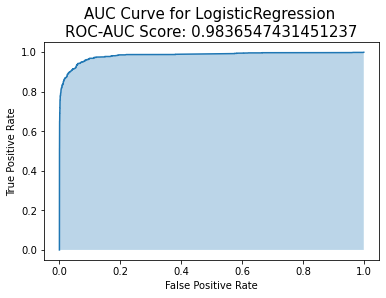


Model training and testing completed

Function End Reached


In [219]:
build_baseline_model(LogisticRegression(),xtrain,ytrain,xtest,ytest,num_cols=nums)

### K Neighbors Classifier

2021-10-04 08:37:34 INFO-Training KNeighborsClassifier Model complete
2021-10-04 08:37:34 INFO-Training KNeighborsClassifier Model complete
2021-10-04 08:37:34 INFO-Training KNeighborsClassifier Model complete
2021-10-04 08:37:34 INFO-Training KNeighborsClassifier Model complete


Model Performance - KNeighborsClassifier
Train Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     31620
           1       0.98      0.93      0.96      7905

    accuracy                           0.98     39525
   macro avg       0.98      0.96      0.97     39525
weighted avg       0.98      0.98      0.98     39525


Average f1 Score: 0.9344049185703934
Average Std in F1 score: 0.0020093650578765975

Test Result:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13552
           1       0.97      0.91      0.94      3388

    accuracy                           0.98     16940
   macro avg       0.97      0.95      0.96     16940
weighted avg       0.98      0.98      0.98     16940



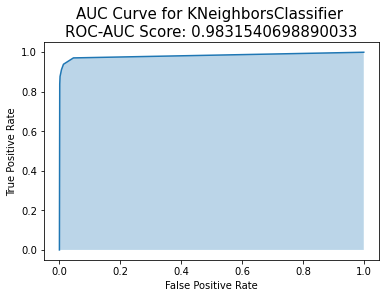


Model training and testing completed

Function End Reached


In [220]:
build_baseline_model(KNeighborsClassifier(),xtrain,ytrain,xtest,ytest,num_cols=nums,scaling=True)

### Decision Tree

2021-10-04 08:37:54 INFO-Training DecisionTreeClassifier(random_state=0) Model complete
2021-10-04 08:37:54 INFO-Training DecisionTreeClassifier(random_state=0) Model complete
2021-10-04 08:37:54 INFO-Training DecisionTreeClassifier(random_state=0) Model complete
2021-10-04 08:37:54 INFO-Training DecisionTreeClassifier(random_state=0) Model complete


Model Performance - DecisionTreeClassifier(random_state=0)
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.94      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average f1 Score: 0.9456713118113521
Average Std in F1 score: 0.003544866508632765

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.99      0.91      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.95      0.97     16940
weighted avg       0.98      0.98      0.98     16940



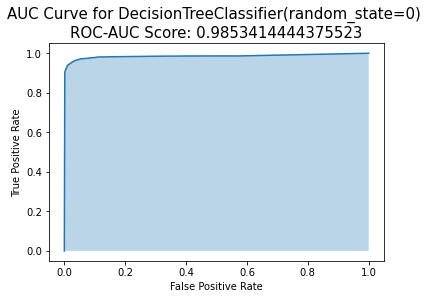


Model training and testing completed

Function End Reached


In [221]:
build_baseline_model(DecisionTreeClassifier(random_state=0),xtrain,ytrain,xtest,ytest,num_cols=nums)

### Support Vector Machine

2021-10-04 08:39:29 INFO-Training SVC(probability=True) Model complete
2021-10-04 08:39:29 INFO-Training SVC(probability=True) Model complete
2021-10-04 08:39:29 INFO-Training SVC(probability=True) Model complete
2021-10-04 08:39:29 INFO-Training SVC(probability=True) Model complete


Model Performance - SVC(probability=True)
Train Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31620
           1       0.96      0.88      0.92      7905

    accuracy                           0.97     39525
   macro avg       0.97      0.94      0.95     39525
weighted avg       0.97      0.97      0.97     39525


Average f1 Score: 0.9172595674815912
Average Std in F1 score: 0.0026264672035209804

Test Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13552
           1       0.96      0.88      0.92      3388

    accuracy                           0.97     16940
   macro avg       0.96      0.93      0.95     16940
weighted avg       0.97      0.97      0.97     16940



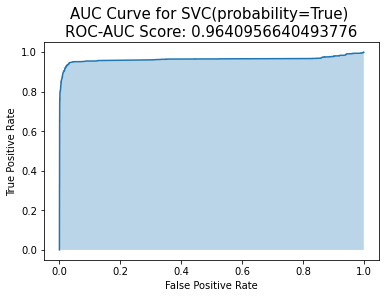


Model training and testing completed

Function End Reached


In [222]:
build_baseline_model(SVC(probability=True),xtrain,ytrain,xtest,ytest,num_cols=nums)

### Random Forest Classifier

2021-10-04 08:41:35 INFO-Training RandomForestClassifier(random_state=0) Model complete
2021-10-04 08:41:35 INFO-Training RandomForestClassifier(random_state=0) Model complete
2021-10-04 08:41:35 INFO-Training RandomForestClassifier(random_state=0) Model complete
2021-10-04 08:41:35 INFO-Training RandomForestClassifier(random_state=0) Model complete


Model Performance - RandomForestClassifier(random_state=0)
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.95      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average f1 Score: 0.9514922313474065
Average Std in F1 score: 0.0023460279914436014

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.98      0.93      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.96      0.97     16940
weighted avg       0.98      0.98      0.98     16940



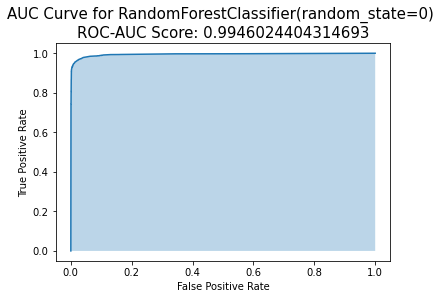


Model training and testing completed

Function End Reached


In [223]:
build_baseline_model(RandomForestClassifier(random_state=0),xtrain,ytrain,xtest,ytest,num_cols=nums)

### Ada Boost Classifier

2021-10-04 08:41:42 INFO-Training AdaBoostClassifier(random_state=0) Model complete
2021-10-04 08:41:42 INFO-Training AdaBoostClassifier(random_state=0) Model complete
2021-10-04 08:41:42 INFO-Training AdaBoostClassifier(random_state=0) Model complete
2021-10-04 08:41:42 INFO-Training AdaBoostClassifier(random_state=0) Model complete


Model Performance - AdaBoostClassifier(random_state=0)
Train Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31620
           1       0.94      0.89      0.92      7905

    accuracy                           0.97     39525
   macro avg       0.96      0.94      0.95     39525
weighted avg       0.97      0.97      0.97     39525


Average f1 Score: 0.9168103999299508
Average Std in F1 score: 0.004832387417025825

Test Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13552
           1       0.94      0.89      0.91      3388

    accuracy                           0.97     16940
   macro avg       0.96      0.94      0.95     16940
weighted avg       0.97      0.97      0.97     16940



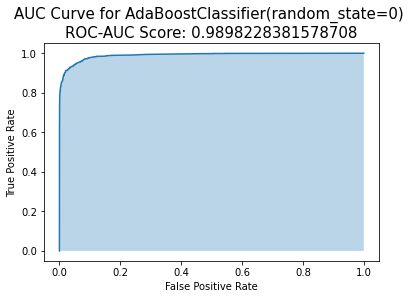


Model training and testing completed

Function End Reached


In [224]:
build_baseline_model(AdaBoostClassifier(random_state=0),xtrain,ytrain,xtest,ytest,num_cols=nums)

### Gradient Boosting Classifier

2021-10-04 08:41:47 INFO-Training GradientBoostingClassifier(random_state=0) Model complete
2021-10-04 08:41:47 INFO-Training GradientBoostingClassifier(random_state=0) Model complete
2021-10-04 08:41:47 INFO-Training GradientBoostingClassifier(random_state=0) Model complete
2021-10-04 08:41:47 INFO-Training GradientBoostingClassifier(random_state=0) Model complete


Model Performance - GradientBoostingClassifier(random_state=0)
Train Result:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     31620
           1       0.96      0.91      0.93      7905

    accuracy                           0.97     39525
   macro avg       0.97      0.95      0.96     39525
weighted avg       0.97      0.97      0.97     39525


Average f1 Score: 0.9313836156372112
Average Std in F1 score: 0.0018065136545790646

Test Result:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     13552
           1       0.96      0.90      0.93      3388

    accuracy                           0.97     16940
   macro avg       0.97      0.95      0.96     16940
weighted avg       0.97      0.97      0.97     16940



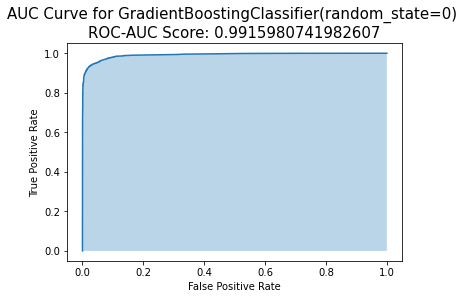


Model training and testing completed

Function End Reached


In [225]:
build_baseline_model(GradientBoostingClassifier(random_state=0),xtrain,ytrain,xtest,ytest,num_cols=nums)

### XGB Classifier

[08:41:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


2021-10-04 08:41:54 INFO-Training XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) Model complete
2021-10-04 08:41:54 INFO-Training XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_dept

[08:41:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:41:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model Performance - XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
  

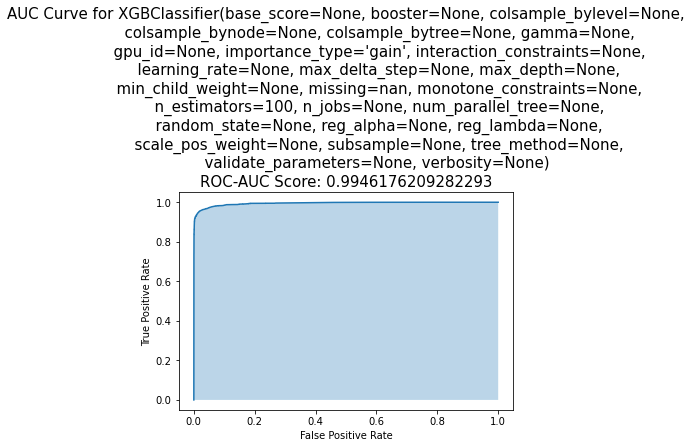


Model training and testing completed

Function End Reached


In [226]:
build_baseline_model(XGBClassifier(),xtrain,ytrain,xtest,ytest,num_cols=nums)

In [227]:
baseline_results.dropna(inplace=True)
baseline_results

,Model,Train F1 score,Test F1,ROC-AUC,CV F1 average,CV F1 std average,Model Latency for 1 unit
1,LogisticRegression,0.899183,0.893860,0.983655,0.899652,0.004315,0.000512
2,KNeighborsClassifier,0.955115,0.940639,0.983154,0.934405,0.002009,0.002590
3,DecisionTreeClassifier(random_state=0),0.968340,0.947707,0.985341,0.945671,0.003545,0.000499
4,SVC(probability=True),0.921131,0.915061,0.964096,0.917260,0.002626,0.000940
5,RandomForestClassifier(random_state=0),0.968484,0.954587,0.994602,0.951492,0.002346,0.014952
6,AdaBoostClassifier(random_state=0),0.916341,0.914095,0.989823,0.916810,0.004832,0.009895
7,GradientBoostingClassifier(random_state=0),0.933299,0.929814,0.991598,0.931384,0.001807,0.000830
8,"XGBClassifier(base_score=None, booster=None, c...",0.961533,0.951730,0.994618,0.946935,0.005028,0.002475


Inferences - 

- Based on the analysis of f1 scores, cross validation and model latency for several models, we will decide which model to choose for further tuning.
- In terms of F1 scores across train and test, XGB Classifier, Random Forest Classifier and K Nearest Neighbors are providing scores around 0.94-0.96, with Random Forest Providing the best result on test i.e 0.954
- In terms of Area Under Curve scores, XGB Classifier, Gradient Boosting and Random Forest Classifier are providing scores aroud 0.99, with XGB Classifier and Random Forest with identical scores of 0.994.
- In terms of cross validation, Random Forest Provides the best result across the 3 training samples i.e 0.95. However,Gradient Boosting classifier provides the lowest deviation in f1 scores i.e 0.001807. Amongst other ensemble techniques,Random Forest provides the lowest deviation i.e 0.0023.
- In terms of latency i.e amount of time model takes to make a prediction for a given input, single estimators like Decision Tree, Logistic regression and Support Vector take the lowest time.
- Random Forest takes the highest amount of time. However, using feature selection and parameter tuning, we can reduce latency time.
- Based on comparisons, we can see that Random Forest is the best performer and hence, we will choose Random Forest for further tuning

## Feature Selection

In [228]:
! pip install mlxtend

In [229]:
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector

In [230]:
baseline_best_features = pd.DataFrame({"Model":None,"Train F1 score":None,"Test F1":None,"Test Recall":None,"CV Recall average":None,"CV Recall std average":None,"Model Latency for 1 unit in seconds":None},index=range(1))

In [231]:
def build_feature_selection_model(model_estimator,feature_selector_estimator,x_training,y_training,x_testing,y_testing,scaling=False,num_cols=None):
    
    """
    Creates a ML Model for given model_estimator and train sample and tests on test sample. Performs cross validation too. Uses f1 score for evaluation.
    
    Note - It is assumed that missing values treatment, outlier treatment, transformation and encoding have already been performed.
    
    Also, if unknown technique passed or no technique passed, default technique used is feature importance
    Arguments - 
    
    1. num_cols : A list of numerical features in the dataset. If not passed, function will try to find numerical features
    
    """
    if str(f"{model_estimator}").replace("()","") == "XGBClassifier":
        model_str = "XGBClassifier"
    else:
        model_str = str(f"{model_estimator}").replace("()","")
        
    
    if str(f"{feature_selector_estimator}").split("(")[0] != "TOP10FeatureImportances":
        feature_selector_estimator_str = str(f"{feature_selector_estimator}").split("(")[0]
    else:
        feature_selector_estimator_str = "TOP10FeatureImportances"
    
    if num_cols == None:
        nums_cols = list(x_training.select_dtypes(include=np.object).columns)
    
    if scaling == True:
        from sklearn.preprocessing import StandardScaler
        SC = StandardScaler().fit(x_training[list(num_cols)])
        x_training[list(nums)] = SC.transform(x_training[list(num_cols)])
        x_testing[list(nums)] = SC.transform(x_testing[list(num_cols)])
    
    
    try:
        
        # Finding best features
        
        if feature_selector_estimator_str == "SequentialFeatureSelector":
            SFS = SequentialFeatureSelector(model_estimator,k_features="best",cv=3,scoring="recall",forward=False).fit(x_training,y_training)
            logger.info("Performing Forward Feature Elimination")
            top_features = list(SFS.k_feature_names_)
                
        elif feature_selector_estimator_str == "RFECV":
            RFE = RFECV(RandomForestClassifier(random_state=0),min_features_to_select=10,cv=3,scoring="recall").fit(x_training,y_training)
            logger.info("Performing Recursive Feature Elimination")
            top_features = list(x_training.columns[RFE.ranking_==1])
                
        elif feature_selector_estimator_str == "TOP10FeatureImportances":
            print("Since no feature selector technique chosen or unknown selection technique chosen, top 10 features from Feature Importances will be chosen")
            model = model_estimator.fit(x_training,y_training)
            importances = pd.DataFrame({"Feature":x_training.columns,"Importances":model.feature_importances_})
            importances.sort_values(by="Importances",ascending=False,inplace=True)
            logger.info("Calculating Feature Importances")
            top_features = importances.iloc[:10,0].tolist()
            
        ## Training the model and calculating f1 scores on train and test along with cross validation scores
        
        model = model_estimator.fit(x_training[top_features],y_training)
        train_pred = model.predict(x_training[top_features])
        logger.info(f"Training {model_str} with {feature_selector_estimator_str} Model complete")
        test_pred = model.predict(x_testing[top_features])
        cv = cross_val_score(model_estimator,x_training[top_features],y_training,scoring="recall",cv=3)
        train_f1 = f1_score(y_training,train_pred)
        test_f1 = f1_score(y_testing,test_pred)
        recall = recall_score(ytest,test_pred)
        cv_mean = cv.mean()
        cv_std = cv.std()

        ## Model Latency for 1 unit in seconds
        start = datetime.datetime.now()
        model.predict(x_training[top_features].iloc[0].values.reshape(1,-1))
        end = datetime.datetime.now()
        latency = (end.microsecond - start.microsecond) / 1000000
    

        ## Calculating ROC AUC Score
        test_pred_prob = model.predict_proba(x_testing[top_features])[:,1]
        roc = roc_auc_score(y_testing,test_pred_prob)

    
        ## Appending results to model performance table
    
        try:
            global baseline_best_features
    
            baseline_best_features = baseline_best_features.append({"Model":f"{model_str} - {feature_selector_estimator_str}","Train F1 score":train_f1,"Test F1":test_f1,"Test Recall":recall,"CV Recall average":cv_mean,"CV Recall std average":cv_std,"Model Latency for 1 unit in seconds":latency},ignore_index=True)
        except NameError:
            print("Baseline best features results table not defined")
    
        ## Displaying results
        print(f"Model Performance - {model_str} with features from {feature_selector_estimator_str}")
    
        print("Train Result:",classification_report(y_training,train_pred),sep="\n")
        print()
        print(f"Average recall Score: {cv_mean}",f"Average Std in recalls score: {cv_std}",sep="\n")
        print()
        print("Test Result:",classification_report(y_testing,test_pred),sep="\n")

        fpr,tpr,thres = roc_curve(y_testing,test_pred_prob)
        plt.plot(fpr,tpr)
        plt.fill_between(fpr,tpr,alpha=0.3)
        plt.title(f"AUC Curve for {model_str} \nROC-AUC Score: {roc}",size=15)
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.show()
        
        plt.figure(figsize = (6,5))
        sns.heatmap(confusion_matrix(y_testing,test_pred),annot=True,cbar=False,fmt="g")
        plt.xlabel("Predicted Labels")
        plt.ylabel("Actual Labels")
        plt.xticks([0.5,1.5],["Non Backorders","Backorders"])
        plt.yticks([0.5,1.5],["Non Backorders","Backorders"])
        plt.title(f"CONFUSION MATRIX for {model_str} with {feature_selector_estimator_str}")
        plt.show()
        
        print("","Model training and testing completed","",sep="\n")
        
    except NameError:
        print("Either the model_estimator or one or more of the samples are not defined or loaded")
        logging.error(f"Either the {model_str} model_estimator, {feature_selector_estimator_str} or one or more of the samples are not defined or loaded")
    except AttributeError:
        print("Model has no feature importance attribute")
        logging.error(f"{model_str} has no feature importance attribute")
    else:
        print("Function End Reached")
        
    return top_features

### Backward Feature Elimination

2021-10-04 08:50:25 INFO-Performing Forward Feature Elimination
2021-10-04 08:50:25 INFO-Performing Forward Feature Elimination
2021-10-04 08:50:25 INFO-Performing Forward Feature Elimination
2021-10-04 08:50:25 INFO-Performing Forward Feature Elimination
2021-10-04 08:50:28 INFO-Training RandomForestClassifier(random_state=0) with SequentialFeatureSelector Model complete
2021-10-04 08:50:28 INFO-Training RandomForestClassifier(random_state=0) with SequentialFeatureSelector Model complete
2021-10-04 08:50:28 INFO-Training RandomForestClassifier(random_state=0) with SequentialFeatureSelector Model complete
2021-10-04 08:50:28 INFO-Training RandomForestClassifier(random_state=0) with SequentialFeatureSelector Model complete


Model Performance - RandomForestClassifier(random_state=0) with features from SequentialFeatureSelector
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.95      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average recall Score: 0.9302972802024035
Average Std in recalls score: 0.0036180517763630586

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.98      0.93      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.96      0.97     16940
weighted avg       0.98      0.98      0.98     16940



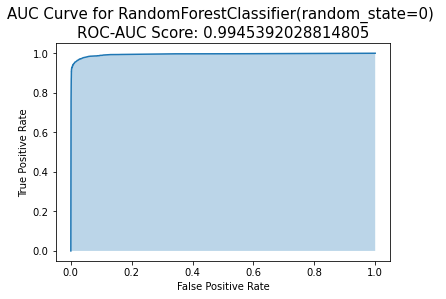

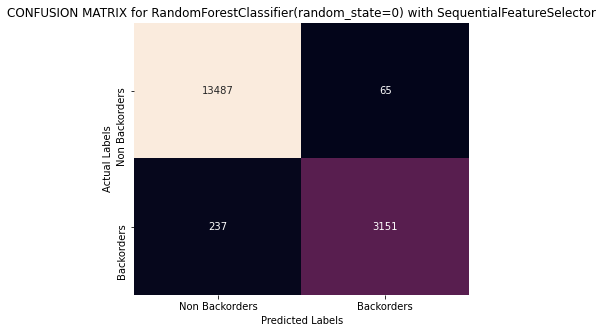


Model training and testing completed

Function End Reached


In [232]:
sfs = build_feature_selection_model(RandomForestClassifier(random_state=0),SequentialFeatureSelector(RandomForestClassifier(random_state=0),forward=False,k_features="best",cv=3,scoring="recall"),xtrain,ytrain,xtest,ytest)

In [233]:
sfs

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_6_month',
 'sales_6_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'local_bo_qty',
 'x1_Yes',
 'x2_Yes',
 'x3_Yes',
 'x4_Yes']

### Recursive Feature Elimination

2021-10-04 08:51:04 INFO-Performing Recursive Feature Elimination
2021-10-04 08:51:04 INFO-Performing Recursive Feature Elimination
2021-10-04 08:51:04 INFO-Performing Recursive Feature Elimination
2021-10-04 08:51:04 INFO-Performing Recursive Feature Elimination
2021-10-04 08:51:06 INFO-Training RandomForestClassifier(random_state=0) with RFECV Model complete
2021-10-04 08:51:06 INFO-Training RandomForestClassifier(random_state=0) with RFECV Model complete
2021-10-04 08:51:06 INFO-Training RandomForestClassifier(random_state=0) with RFECV Model complete
2021-10-04 08:51:06 INFO-Training RandomForestClassifier(random_state=0) with RFECV Model complete


Model Performance - RandomForestClassifier(random_state=0) with features from RFECV
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.95      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average recall Score: 0.9299177735610374
Average Std in recalls score: 0.002176426380023456

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.98      0.93      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.96      0.97     16940
weighted avg       0.98      0.98      0.98     16940



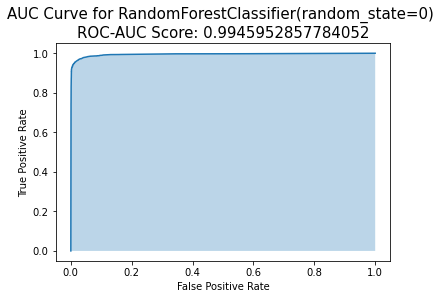

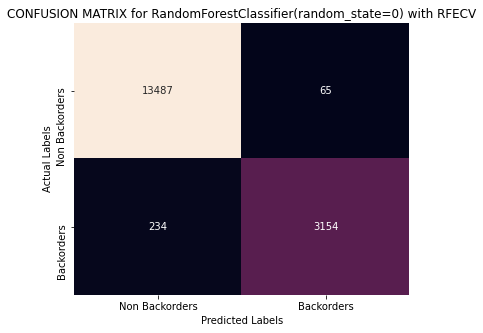


Model training and testing completed

Function End Reached


In [234]:
rfe = build_feature_selection_model(RandomForestClassifier(random_state=0),RFECV(RandomForestClassifier(random_state=0),min_features_to_select=10,cv=3,scoring="recall"),xtrain,ytrain,xtest,ytest)

In [235]:
rfe

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_6_month',
 'sales_6_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'local_bo_qty',
 'x0_Yes',
 'x1_Yes',
 'x2_Yes',
 'x3_Yes',
 'x4_Yes']

### TOP 10 Feature Importances

Since no feature selector technique chosen or unknown selection technique chosen, top 10 features from Feature Importances will be chosen


2021-10-04 08:51:13 INFO-Calculating Feature Importances
2021-10-04 08:51:13 INFO-Calculating Feature Importances
2021-10-04 08:51:13 INFO-Calculating Feature Importances
2021-10-04 08:51:13 INFO-Calculating Feature Importances
2021-10-04 08:51:16 INFO-Training RandomForestClassifier(random_state=0) with TOP10FeatureImportances Model complete
2021-10-04 08:51:16 INFO-Training RandomForestClassifier(random_state=0) with TOP10FeatureImportances Model complete
2021-10-04 08:51:16 INFO-Training RandomForestClassifier(random_state=0) with TOP10FeatureImportances Model complete
2021-10-04 08:51:16 INFO-Training RandomForestClassifier(random_state=0) with TOP10FeatureImportances Model complete


Model Performance - RandomForestClassifier(random_state=0) with features from TOP10FeatureImportances
Train Result:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31620
           1       0.99      0.95      0.97      7905

    accuracy                           0.99     39525
   macro avg       0.99      0.97      0.98     39525
weighted avg       0.99      0.99      0.99     39525


Average recall Score: 0.9283997469955724
Average Std in recalls score: 0.0028116522164317427

Test Result:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13552
           1       0.98      0.93      0.95      3388

    accuracy                           0.98     16940
   macro avg       0.98      0.96      0.97     16940
weighted avg       0.98      0.98      0.98     16940



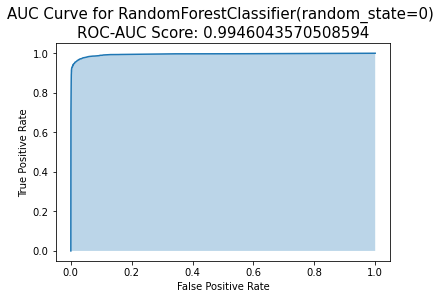

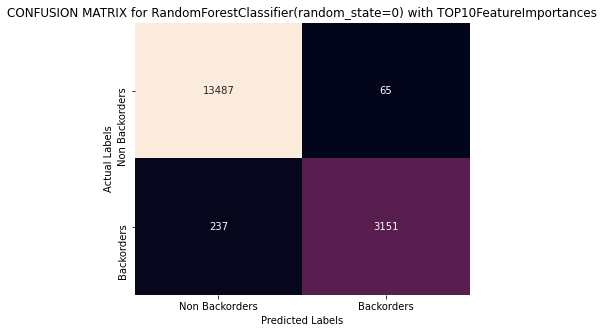


Model training and testing completed

Function End Reached


In [236]:
top10 = build_feature_selection_model(RandomForestClassifier(random_state=0),feature_selector_estimator="TOP10FeatureImportances",x_training=xtrain,y_training=ytrain,x_testing=xtest,y_testing=ytest)

In [237]:
top10

['sales_6_month',
 'forecast_6_month',
 'min_bank',
 'perf_6_month_avg',
 'lead_time',
 'national_inv',
 'in_transit_qty',
 'x1_Yes',
 'local_bo_qty',
 'x3_Yes']

In [238]:
baseline_best_features.dropna(inplace=True)
baseline_best_features

,Model,Train F1 score,Test F1,Test Recall,CV Recall average,CV Recall std average,Model Latency for 1 unit in seconds
1,RandomForestClassifier(random_state=0) - Seque...,0.968484,0.954270,0.930047,0.930297,0.003618,0.01621
2,RandomForestClassifier(random_state=0) - RFECV,0.968484,0.954745,0.930933,0.929918,0.002176,0.01624
3,RandomForestClassifier(random_state=0) - TOP10...,0.968217,0.954270,0.930047,0.928400,0.002812,0.01648


#### Observations - 

- We applied the backward feature elimination, recursive feature elimination and feature importance technique using Random Forest.

- On comparing the f1 scores on train and test, recall on test, cross validation and model latency, we can conclude that while test f1 and recall scores are same for all methods, the f1 scores and cross validation recall score for RFE is the best across all models.

- Across all models, despite using lesser or optimum no. of features, the models are taking more time to make a prediction.

- The latency of Random Forest using the top 10 features, compared to the other models using RFE and SFS, is slightly higher.

- However, in terms of interpretation and user interface, using top 10 features is easy as it uses lesser no. of features.

- Also the model using the top 10 features has the lowest deviation in cross validation recalls. 

- Also, categorical features from the top 10 can be easily understood as compared to the other models. Other categorical features have no proper explanation, hence making it difficult for users to answer. The categorical features suggested by feature importances and can be interpretated.

- Also, Hence, we will use Random Forest Classifier with top 10 features. We will try to tune the model to reduce latency.

## Grid Search / Random Search

In [253]:
params = {"n_estimators":[20,40,60,80],"max_depth":range(3,11),"criterion":["gini","entropy"],"min_samples_leaf":[20,30,40,50],"min_samples_split":[60,50,40]}

In [254]:
logger.info("Hyperparameter Tuning started using Grid Search")
grid = GridSearchCV(RandomForestClassifier(random_state=0),params,cv=3,scoring="recall").fit(xtrain[top10],ytrain)

2021-10-04 09:38:01 INFO-Hyperparameter Tuning started using Grid Search
2021-10-04 09:38:01 INFO-Hyperparameter Tuning started using Grid Search
2021-10-04 09:38:01 INFO-Hyperparameter Tuning started using Grid Search
2021-10-04 09:38:01 INFO-Hyperparameter Tuning started using Grid Search


In [255]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 50,
 'n_estimators': 60}

In [256]:
best_params = {"criterion":"entropy",'max_depth': 10, 'n_estimators': 60,"min_samples_leaf":20,"min_samples_split":50}
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 60,
 'min_samples_leaf': 20,
 'min_samples_split': 50}

In [39]:
pickle.dump(best_params,open("best_params.pkl","wb"))

2021-10-04 09:59:27 INFO-Training tuned rf classifier with importances features
2021-10-04 09:59:27 INFO-Training tuned rf classifier with importances features
2021-10-04 09:59:27 INFO-Training tuned rf classifier with importances features
2021-10-04 09:59:27 INFO-Training tuned rf classifier with importances features


Train Result:
Latency: 0.01158
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     31620
           1       0.97      0.90      0.93      7905

    accuracy                           0.97     39525
   macro avg       0.97      0.95      0.96     39525
weighted avg       0.97      0.97      0.97     39525


Average Recall Score: 0.8958087367178277
Average Std in recall score: 0.005132311897558682

Test Result:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13552
           1       0.96      0.90      0.93      3388

    accuracy                           0.97     16940
   macro avg       0.97      0.94      0.96     16940
weighted avg       0.97      0.97      0.97     16940



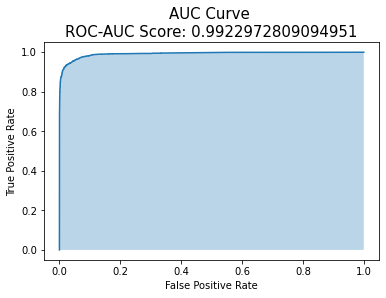

In [257]:
tuned_rf_importances = RandomForestClassifier(max_depth=10,n_estimators = 60,random_state=0,criterion="entropy",min_samples_leaf=20,min_samples_split=50).fit(xtrain[top10],ytrain)
logger.info("Training tuned rf classifier with importances features")
tuned_rf_importances_train_pred = tuned_rf_importances.predict(xtrain[top10])
tuned_rf_importances_test_pred = tuned_rf_importances.predict(xtest[top10])
tuned_rf_importances_cv = cross_val_score(RandomForestClassifier(max_depth=10,n_estimators = 60,random_state=0,criterion="entropy",min_samples_leaf=20,min_samples_split=50),xtrain[top10],ytrain,scoring="recall",cv=3)
tuned_rf_importances_train_f1 = f1_score(ytrain,tuned_rf_importances_train_pred)
tuned_rf_importances_test_f1 = f1_score(ytest,tuned_rf_importances_test_pred)
tuned_rf_importances_recall = recall_score(ytest,tuned_rf_importances_test_pred)
tuned_rf_importances_cv_mean = tuned_rf_importances_cv.mean()
tuned_rf_importances_cv_std = tuned_rf_importances_cv.std()

## Model Latency for 1 unit
start = datetime.datetime.now()
tuned_rf_importances.predict(xtrain[top10].iloc[0].values.reshape(1,-1))
end = datetime.datetime.now()
latency = (end.microsecond - start.microsecond) / 1000000


print("Train Result:",f"Latency: {latency}",classification_report(ytrain,tuned_rf_importances_train_pred),sep="\n")
print()
print(f"Average Recall Score: {tuned_rf_importances_recall}",f"Average Std in recall score: {tuned_rf_importances_cv_std}",sep="\n")
print()
print("Test Result:",classification_report(ytest,tuned_rf_importances_test_pred),sep="\n")

tuned_rf_importances_test_pred_prob = tuned_rf_importances.predict_proba(xtest[top10])[:,1]
tuned_rf_importances_roc = roc_auc_score(ytest,tuned_rf_importances_test_pred_prob)
fpr,tpr,thres = roc_curve(ytest,tuned_rf_importances_test_pred_prob)
plt.plot(fpr,tpr)
plt.fill_between(fpr,tpr,alpha=0.3)
plt.title(f"AUC Curve \nROC-AUC Score: {tuned_rf_importances_roc}",size=15)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### Observations - 

- On tuning the Random Forest with top 10 features, the performance of the model dropped slightly indicated by the lower ROC-AUC Score, lower recall, lower f1 train and test scores.
- Also, from the roc-auc curve, we can see that the roc-auc score has dropped to 0.9922 from 0.994.
- While the recall on test has remained same, we can see higher deviation in recall scores during cross validation have increased from 0.0028 to 0.0055 and average recall has dropped from approx 0.93 to 0.90.
- Though latency has reduced by from 0.015 to 0.011 however, performances have reduced.
- We cannot afford too much compromise on performance for few microseconds as increased false negatives might cause a business to lose potential customers and sales and hence we will continue using the baseline random forest model with top 10 features.

In [258]:
model = RandomForestClassifier(random_state=0).fit(xtrain[top10],ytrain)

pickle.dump(model,open("rf_importances.pkl","wb"))

In [259]:
pickle.dump(top10,open("Final_Features.pkl","wb"))